In [1]:
import numpy as np
import pandas as pd

from scipy import integrate

import matplotlib.pyplot as plt


### Initial Conditions

In [2]:
x_0, x_n = 0, 1
u_0, u_n = 0, 0

In [33]:
N = 4
delta = (x_n - x_0) / N
x = np.linspace(x_0, x_n, N+1)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Analytical Solution

In [34]:
xx = np.linspace(x_0, x_n, 1000)
uu_f = np.vectorize(lambda x: x**2 / 2 - 0.25*x if x <= 0.5 else -x**2 / 2 + 0.75*x - 0.25 )
uu = uu_f(xx)

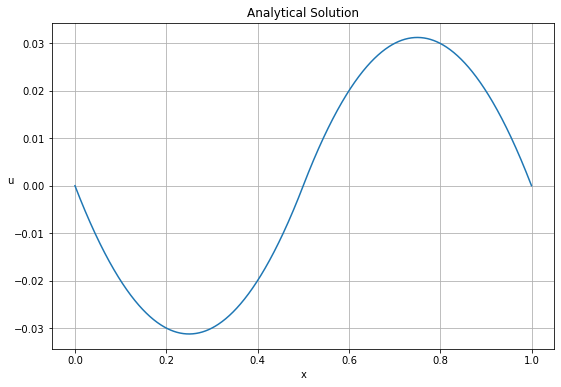

In [35]:
plt.figure(1, figsize=(9, 6))
plt.plot(xx, uu, label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.title('Analytical Solution')
plt.grid(True)
plt.show(1)

### First Approach

#### Construct matrix

In [36]:
def constr_matrix(N):
    A = np.zeros((N+1, N+1))

    np.fill_diagonal(A[:N, :N-1] , 1)
    np.fill_diagonal(A[:N, 1:N], -2)
    np.fill_diagonal(A[:N, 2:N+1], 1)

    A[N-1, 0], A[N, N] = 1, 1

    return A

A = constr_matrix(N)
A

array([[ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

#### Construct vector

In [37]:
def constr_vect(N, delta, x, u_0, u_n):
    b = np.zeros((N+1, 1))
    f_b = np.vectorize(lambda x: 1 if 0 <= x < 0.5 else (0 if  x == 0.5 else -1))
    b[:-2] = (delta**2)*f_b(x[1:-1]).reshape(-1,1)
    b[-2], b[-1] = u_0, u_n
    return b

b = constr_vect(N, delta, x, u_0, u_n)
b

array([[ 0.0625],
       [ 0.    ],
       [-0.0625],
       [ 0.    ],
       [ 0.    ]])

#### Solve System

In [38]:
result = np.linalg.solve(A, b)
result

array([[ 0.     ],
       [-0.03125],
       [-0.     ],
       [ 0.03125],
       [ 0.     ]])

### Plot Result

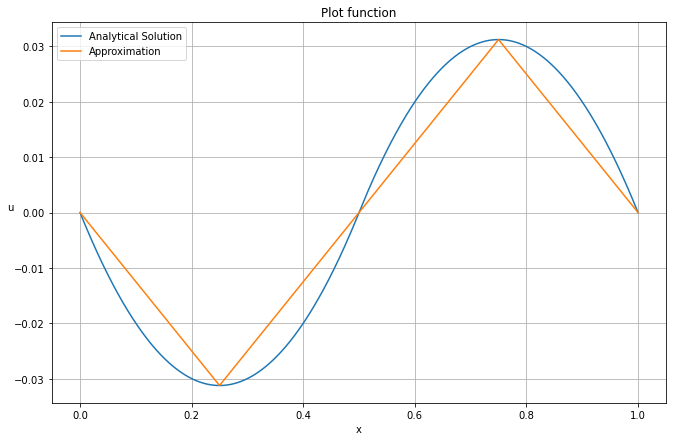

In [39]:
def plot_result(x, result, xx=xx, uu=uu):
    plt.figure(2, figsize=(11, 7))
    plt.plot(xx, uu, label='Analytical Solution')
    plt.plot(x, result, label='Approximation')
    plt.xlabel('x')
    plt.ylabel('u', rotation=0)
    plt.title('Plot function')
    plt.legend()
    plt.grid(True)
    plt.show(2)
    
    
plot_result(x, result, xx=xx, uu=uu)

In [74]:
N = 10
delta = (x_n - x_0) / N
x10 = np.linspace(x_0, x_n, N+1)
x10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [75]:
A = constr_matrix(N)
b = constr_vect(N, delta, x10, u_0, u_n)

result10 = np.linalg.solve(A, b)


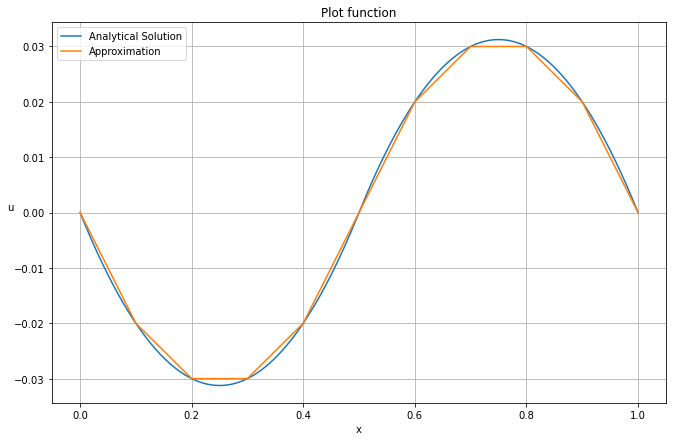

In [76]:
plot_result(x10, result10, xx=xx, uu=uu)

### Calculate Error

In [68]:
N = 6
delta = (x_n - x_0) / N
x = np.linspace(x_0, x_n, N+1)

A = constr_matrix(N)
b = constr_vect(N, delta, x, u_0, u_n)
u_i = np.linalg.solve(A, b)

In [69]:
def line_from_points(x, x1, y1, x2, y2):
    return (x - x1) * (y2 - y1) / (x2 - x1) + y1

Left bound x1 = 0.0 | Right bound x2 = 0.16666666666666666
Left value u1 = [0.] | Right value u2 = [-0.02777778]
Deviation Area = 0.00038580246913580245


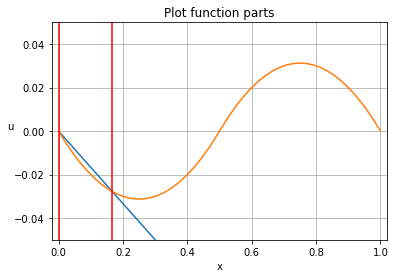

Left bound x1 = 0.16666666666666666 | Right bound x2 = 0.3333333333333333
Left value u1 = [-0.02777778] | Right value u2 = [-0.02777778]
Deviation Area = 0.00038580246913580245


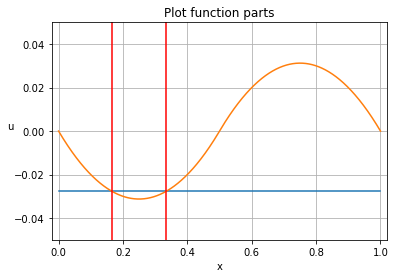

Left bound x1 = 0.3333333333333333 | Right bound x2 = 0.5
Left value u1 = [-0.02777778] | Right value u2 = [2.60208521e-18]
Deviation Area = 0.0003858024691358029


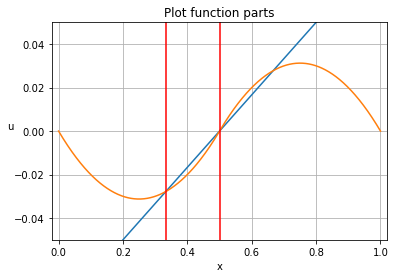

Left bound x1 = 0.5 | Right bound x2 = 0.6666666666666666
Left value u1 = [2.60208521e-18] | Right value u2 = [0.02777778]
Deviation Area = 0.0003858024691358016


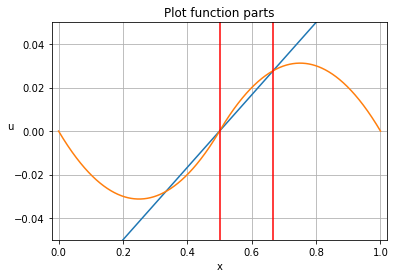

Left bound x1 = 0.6666666666666666 | Right bound x2 = 0.8333333333333333
Left value u1 = [0.02777778] | Right value u2 = [0.02777778]
Deviation Area = 0.0003858024691358016


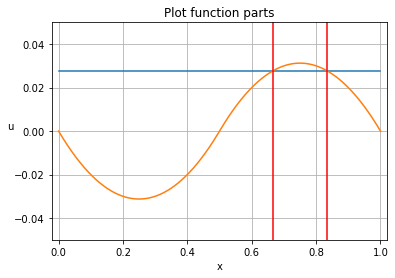

Left bound x1 = 0.8333333333333333 | Right bound x2 = 1.0
Left value u1 = [0.02777778] | Right value u2 = [-0.]
Deviation Area = 0.0003858024691358055


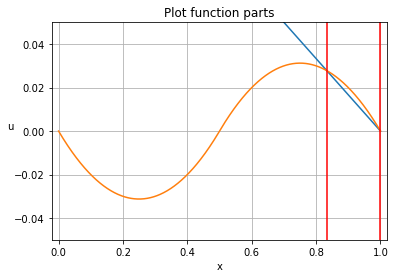

In [70]:
def calc_error(x, u_i, verb=True):    
    error = 0 
    for x1, x2, u1, u2 in zip(x[:-1], x[1:], 
                              u_i[:-1], u_i[1:]):

        val1, _ = integrate.quad(uu_f, a=x1, b=x2)
        val2, _ = integrate.quad(line_from_points, x1, x2, 
                                  args=(x1, u1, x2, u2))

        error += np.abs(val1-val2)
        
        if verb==True:
            print(f'Left bound x1 = {x1}', f'| Right bound x2 = {x2}')
            print(f'Left value u1 = {u1}', f'| Right value u2 = {u2}')
#             print(f'Error = {np.abs(val1-val2)}')
#             print(point2x_line(x, x1, u1, x2, u2))
            print(f'Deviation Area = {np.abs(val1-val2)}')


            plt.plot(x, line_from_points(x, x1, u1, x2, u2))
            plt.plot(xx, uu)
            plt.axvline(x1, c='r')
            plt.axvline(x2, c='r')
            plt.xlim(-0.02, 1.02)
            plt.ylim(-0.05, 0.05)
            plt.xlabel('x')
            plt.ylabel('u', rotation=0)
            plt.title('Plot function parts')
            plt.grid(True)
            plt.show()
            

    return error
    
    
error = calc_error(x, u_i)

In [71]:
print(f'Summary area = {error:5f}')

Summary area = 0.002315


In [72]:
total_area = (abs(integrate.quad(uu_f, x_0, 0.5)[0]) + abs(integrate.quad(uu_f, 0.5, x_n)[0]))
print(f'Total figure area = {total_area:6f}')

relat_error = error / total_area
print(f'Relative Error = {relat_error:6f}')

Total figure area = 0.020833
Relative Error = 0.111111


In [73]:
error_df = pd.DataFrame(columns=['N', 'Error figure area', 'Relative error'])
N_array = np.array([4, 6, 8, 10, 16, 32, 54])

for idx, N in enumerate(N_array):
    delta = (x_n - x_0) / N
    x = np.linspace(x_0, x_n, N+1)

    A = constr_matrix(N)
    b = constr_vect(N, delta, x, u_0, u_n)
    u_i = np.linalg.solve(A, b)
    
    error = calc_error(x, u_i, verb=False)
    relat_error = error / total_area
    
    error_df.loc[idx] = N, error, relat_error
    
    
error_df['Relative error %'] = np.around(error_df['Relative error']*100, 2)
error_df

,N,Error figure area,Relative error,Relative error %
0,4.0,0.005208,0.250000,25.00
1,6.0,0.002315,0.111111,11.11
2,8.0,0.001302,0.062500,6.25
3,10.0,0.000833,0.040000,4.00
4,16.0,0.000326,0.015625,1.56
5,32.0,0.000081,0.003906,0.39
6,54.0,0.000029,0.001372,0.14
